In [1]:
%pylab inline 
%run /nfs/research2/teichmann/valentine/scrnatb/scrnatb/toolbox.py

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('all_data.csv', index_col=0)

In [3]:
data['study'] = data.index.str.split('/').str.get(0).str.split('_').str.get(0)

/nfs/research2/teichmann/valentine/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


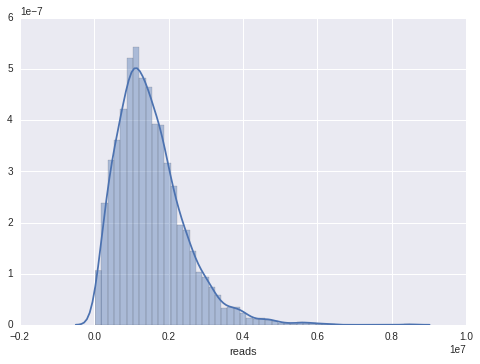

In [4]:
sns.distplot(data.query('study == "SRP045452"')['reads'])

In [5]:
data.query('study == "SRP045452"')['reads'].median()

1364028.0

In [6]:
data.head().T

,ERP005640/ERR489004_salmon_out,ERP005640/ERR489038_salmon_out,ERP005640/ERR488998_salmon_out,ERP005640/ERR488994_salmon_out,ERP005640/ERR489042_salmon_out
ERCC-00002,369.88,699.163,603.279,268.871,667.861
ERCC-00003,4.83956,0.36056,77.7847,43.1686,0.50015
ERCC-00004,104.37,118.117,437.026,282.85,501.574
ERCC-00009,0,14.2843,0.139273,81.818,141.8
ERCC-00012,0,0,0,0,0
ERCC-00013,0,0,0,0,0
ERCC-00014,0,0,0,0,0
ERCC-00016,0,0,0,0,0
ERCC-00017,0,0,0,0,0
ERCC-00019,0,0,0,0,0


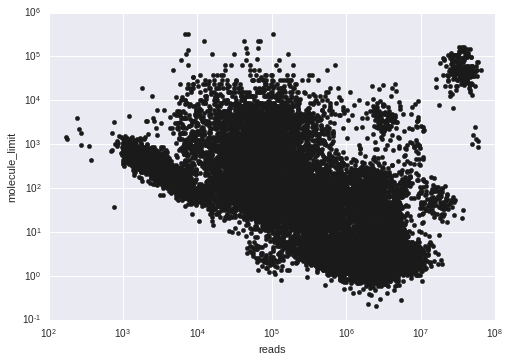

In [7]:
data.plot.scatter('reads', 'molecule_limit', logy=True, logx=True, c='k');

In [8]:
import statsmodels.formula.api as smf

In [9]:
data.volume.value_counts()

10.0       14965
1.1         5015
9.0         4716
1000.0      2077
30.0        1850
1.0          713
10000.0      289
600.0        144
3.8           35
Name: volume, dtype: int64

In [10]:
data['platform'] = pd.cut(data.volume, [0, 2, 10, 1e6], labels=['droplet', 'IFC', 'plate'])

## Sensitivity

In [11]:
tmp = data[['reads', 'protocol', 'molecule_limit', 'platform']].replace(np.inf, np.nan).dropna().query('protocol != "Bulk"')
mod = smf.ols(formula='np.log10(molecule_limit) ~ np.power(np.log10(reads), 2) + np.log10(reads) + C(protocol) + 1', data=tmp)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.log10(molecule_limit)   R-squared:                       0.702
Model:                                  OLS   Adj. R-squared:                  0.701
Method:                       Least Squares   F-statistic:                     1870.
Date:                      Mon, 16 Jan 2017   Prob (F-statistic):               0.00
Time:                              10:11:52   Log-Likelihood:                -17030.
No. Observations:                     20717   AIC:                         3.411e+04
Df Residuals:                         20690   BIC:                         3.433e+04
Df Model:                                26                                         
Covariance Type:                  nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         7.7174      0.181     42.550      0.000         7.362     8.073
C(protocol)[T.CEL-Seq]                            0.7591      0.050     15.155      0.000         0.661     0.857
C(protocol)[T.CEL-Seq2]                           0.4679      0.097      4.819      0.000         0.278     0.658
C(protocol)[T.CEL-Seq2 (C1)]                     -0.2768      0.075     -3.704      0.000        -0.423    -0.130
C(protocol)[T.Chromium]                           0.2361      0.054      4.387      0.000         0.131     0.342
C(protocol)[T.DropSeq]                            0.3716      0.079      4.705      0.000         0.217     0.526
C(protocol)[T.GemCode]                            1.6260      0.052     31.572      0.000         1.525     1.727
C(protocol)[T.GnT-Seq]                            1.5494      0.082     18.842      0.000         1.388     1.711
C(protocol)[T.MARS-Seq]                           1.4671      0.049     29.916      0.000         1.371     1.563
C(protocol)[T.SMARTer (C1)]                      -0.1013      0.054     -1.884      0.060        -0.207     0.004
C(protocol)[T.STRT-C1]                            1.4877      0.075     19.918      0.000         1.341     1.634
C(protocol)[T.STRT-Seq]                          -0.1254      0.050     -2.488      0.013        -0.224    -0.027
C(protocol)[T.SUPeR-Seq]                          1.1184      0.093     12.032      0.000         0.936     1.301
C(protocol)[T.Smart-Seq2]                         1.0029      0.054     18.404      0.000         0.896     1.110
C(protocol)[T.Smart-Seq2_37C overnight]           1.1104      0.201      5.520      0.000         0.716     1.505
C(protocol)[T.Smart-Seq2_Freeze thaw X 2]        -0.8376      0.201     -4.166      0.000        -1.232    -0.443
C(protocol)[T.Smart-Seq2_Freeze thaw X 3]        -0.8212      0.201     -4.084      0.000        -1.215    -0.427
C(protocol)[T.Smart-Seq2_Freeze thaw X 4]        -0.5715      0.201     -2.840      0.005        -0.966    -0.177
C(protocol)[T.Smart-Seq2_Freeze thaw X 5]        -0.2814      0.201     -1.400      0.162        -0.675     0.113
C(protocol)[T.Smart-Seq2_Freeze thaw X 6]        -0.3792      0.201     -1.886      0.059        -0.773     0.015
C(protocol)[T.Smart-Seq2_Room temp overnight]     0.9969      0.201      4.956      0.000         0.603     1.391
C(protocol)[T.Smartseq-C1]                        1.0971      0.076     14.478      0.000         0.949     1.246
C(protocol)[T.Smartseq2-C1]                       0.7824      0.064     12.178      0.000         0.656     0.908
C(protocol)[T.Tang]                               0.4

In [12]:
read_satureation = 10 ** (res.params['np.log10(reads)'] / (-2 * res.params['np.power(np.log10(reads), 2)']))
read_satureation

4710814.0019523632

In [13]:
xx = np.logspace(3, np.log10(read_satureation), 50)
pdf = pd.DataFrame({'reads': xx})
pdf['protocol'] = 'CEL-Seq'

In [14]:
normalised_sensitivity = pd.Series()
for protocol in tmp.groupby(['protocol']).count().dropna().index.tolist():
    normalised_sensitivity[protocol] = 10 ** res.predict(pd.DataFrame({'reads': [1e6], 'protocol': [protocol]}))

In [15]:
color_map = pd.read_table('/nfs/research2/teichmann/valentine/detection-comparison/figures_rev_1/colourCoding.txt', index_col=0, squeeze=True)

In [16]:
color_map['Smart-Seq2_37C overnight'] = color_map['Smart-Seq2']
color_map['Smart-Seq2_Room temp overnight'] = color_map['Smart-Seq2']
color_map['Smart-Seq2_Freeze thaw X 5'] = color_map['Smart-Seq2']
color_map['Smart-Seq2_Freeze thaw X 6'] = color_map['Smart-Seq2']
color_map['Smart-Seq2_Freeze thaw X 4'] = color_map['Smart-Seq2']
color_map['Smart-Seq2_Freeze thaw X 3'] = color_map['Smart-Seq2']
color_map['Smart-Seq2_Freeze thaw X 2'] = color_map['Smart-Seq2']

In [17]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context('poster', font_scale=0.8)
sns.set_style('ticks')

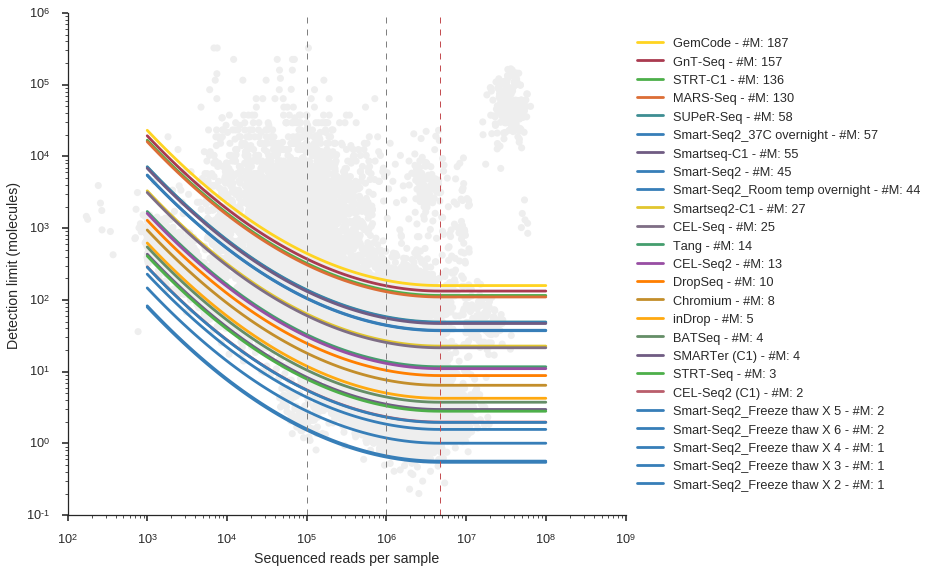

In [18]:
figsize(10, 9)
plt.loglog()
plt.scatter(data.reads, data.molecule_limit, c='#EEEEEE', edgecolor='none', s=50, label=None, rasterized=True);
det_mols = normalised_sensitivity.str.get(0).sort_values().map(round)
for protocol in normalised_sensitivity.sort_values(ascending=False).index:
    tmp = data.query('protocol == "{}"'.format(protocol))
    pdf['protocol'] = protocol
    yy = 10 ** res.predict(pdf)
    xx2 = np.concatenate((xx, np.array([1e8])))
    yy2 = np.concatenate((yy, yy[[-1]]))
    plt.plot(xx2, yy2, label='{} - #M: {}'.format(protocol, det_mols[protocol]), c=color_map[protocol])

plt.axvline(xx[-1], linestyle='--', c='r', lw=1)
plt.axvline(1e6, linestyle='--', c='grey', lw=1)
plt.axvline(1e5, linestyle='--', c='grey', lw=1)

lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

sns.despine()
sns.axlabel('Sequenced reads per sample', 'Detection limit (molecules)');
plt.ylim(1e-1, 1e6);

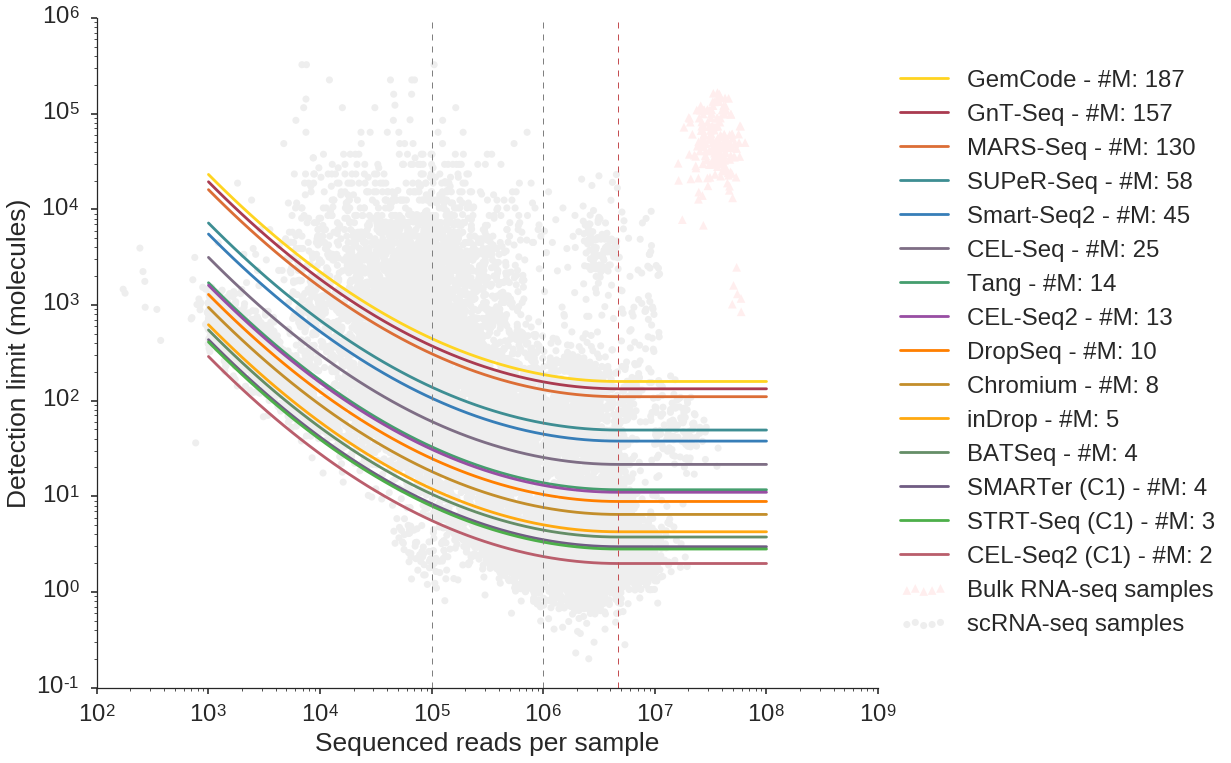

In [57]:
sns.set_context('poster', font_scale=1.5)

figsize(14, 12)

plt.loglog()

tmp = data.query('protocol == "Bulk"')
plt.scatter(tmp.reads, tmp.molecule_limit, c='#FFEEEE', edgecolor='none', s=75, rasterized=True, marker='^', label='Bulk RNA-seq samples');

tmp = data.query('protocol != "Bulk"')
plt.scatter(tmp.reads, tmp.molecule_limit, c='#EEEEEE', edgecolor='none', s=50, rasterized=True, label='scRNA-seq samples');

det_mols = normalised_sensitivity.str.get(0).sort_values().map(round)
for protocol in normalised_sensitivity.sort_values(ascending=False).index:
    if 'Freeze' in protocol:
        continue
        
    if 'Seq2_'in protocol:
        continue
        
    if protocol in ['STRT-C1', 'Smartseq-C1', 'Smartseq2-C1']:
        continue

    tmp = data.query('protocol == "{}"'.format(protocol))
    pdf['protocol'] = protocol
    yy = 10 ** res.predict(pdf)
    xx2 = np.concatenate((xx, np.array([1e8])))
    yy2 = np.concatenate((yy, yy[[-1]]))
    label = 'STRT-Seq (C1)' if protocol == 'STRT-Seq' else protocol
    plt.plot(xx2, yy2, label='{} - #M: {}'.format(label, det_mols[protocol]), c=color_map[protocol])

plt.axvline(xx[-1], linestyle='--', c='r', lw=1)
plt.axvline(1e6, linestyle='--', c='grey', lw=1)
plt.axvline(1e5, linestyle='--', c='grey', lw=1)

lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), scatterpoints=5);

sns.despine()
sns.axlabel('Sequenced reads per sample', 'Detection limit (molecules)');
plt.ylim(1e-1, 1e6);
plt.savefig('figures_rev_2/reads-detection-relation.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

## Accuracy

In [58]:
tmp = data[['reads', 'protocol', 'accuracy', 'platform']].replace(np.inf, np.nan).dropna().query('protocol != "Bulk"')
mod = smf.ols(formula='accuracy ~ np.power(np.log10(reads), 2) + np.log10(reads) + C(protocol) + 1', data=tmp)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               accuracy   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     357.5
Date:                Mon, 16 Jan 2017   Prob (F-statistic):               0.00
Time:                        10:54:58   Log-Likelihood:                 24938.
No. Observations:               20712   AIC:                        -4.982e+04
Df Residuals:                   20685   BIC:                        -4.961e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         0.5197      0.024     21.731      0.000         0.473     0.567
C(protocol)[T.CEL-Seq]                            0.0129      0.007      1.953      0.051     -4.36e-05     0.026
C(protocol)[T.CEL-Seq2]                           0.0595      0.013      4.646      0.000         0.034     0.085
C(protocol)[T.CEL-Seq2 (C1)]                      0.0322      0.010      3.266      0.001         0.013     0.051
C(protocol)[T.Chromium]                           0.0441      0.007      6.209      0.000         0.030     0.058
C(protocol)[T.DropSeq]                            0.0384      0.010      3.691      0.000         0.018     0.059
C(protocol)[T.GemCode]                            0.0050      0.007      0.743      0.458        -0.008     0.018
C(protocol)[T.GnT-Seq]                           -0.1535      0.011    -14.161      0.000        -0.175    -0.132
C(protocol)[T.MARS-Seq]                          -0.0827      0.006    -12.793      0.000        -0.095    -0.070
C(protocol)[T.SMARTer (C1)]                       0.0010      0.007      0.135      0.893        -0.013     0.015
C(protocol)[T.STRT-C1]                           -0.1485      0.010    -15.074      0.000        -0.168    -0.129
C(protocol)[T.STRT-Seq]                           0.0280      0.007      4.221      0.000         0.015     0.041
C(protocol)[T.SUPeR-Seq]                          0.0706      0.012      5.761      0.000         0.047     0.095
C(protocol)[T.Smart-Seq2]                        -0.0346      0.007     -4.821      0.000        -0.049    -0.021
C(protocol)[T.Smart-Seq2_37C overnight]          -0.0638      0.027     -2.405      0.016        -0.116    -0.012
C(protocol)[T.Smart-Seq2_Freeze thaw X 2]         0.0685      0.027      2.582      0.010         0.016     0.120
C(protocol)[T.Smart-Seq2_Freeze thaw X 3]         0.0538      0.027      2.029      0.043         0.002     0.106
C(protocol)[T.Smart-Seq2_Freeze thaw X 4]         0.0395      0.027      1.490      0.136        -0.012     0.092
C(protocol)[T.Smart-Seq2_Freeze thaw X 5]         0.0144      0.027      0.543      0.587        -0.038     0.066
C(protocol)[T.Smart-Seq2_Freeze thaw X 6]         0.0252      0.027      0.949      0.343        -0.027     0.077
C(protocol)[T.Smart-Seq2_Room temp overnight]    -0.0561      0.027     -2.117      0.034        -0.108    -0.004
C(protocol)[T.Smartseq-C1]                       -0.1038      0.010    -10.390      0.000        -0.123    -0.084
C(protocol)[T.Smartseq2-C1]                      -0.1279      0.008    -15.096      0.000        -0.144    -0.111
C(protocol)[T.Tang]                              -0.0428      0.008     -5.479      0.000        -0.058    -0.027
C(pro

In [59]:
read_satureation = 10 ** (res.params['np.log10(reads)'] / (-2 * res.params['np.power(np.log10(reads), 2)']))
read_satureation

268935.18490144709

In [60]:
xx = np.logspace(3, np.log10(read_satureation), 50)
pdf = pd.DataFrame({'reads': xx})
pdf['protocol'] = 'CEL-Seq'

In [61]:
normalised_accuracy = pd.Series()
for protocol in tmp.groupby(['protocol']).count().dropna().index.tolist():
    normalised_accuracy[protocol] = res.predict(pd.DataFrame({'reads': [1e6], 'protocol': [protocol]}))

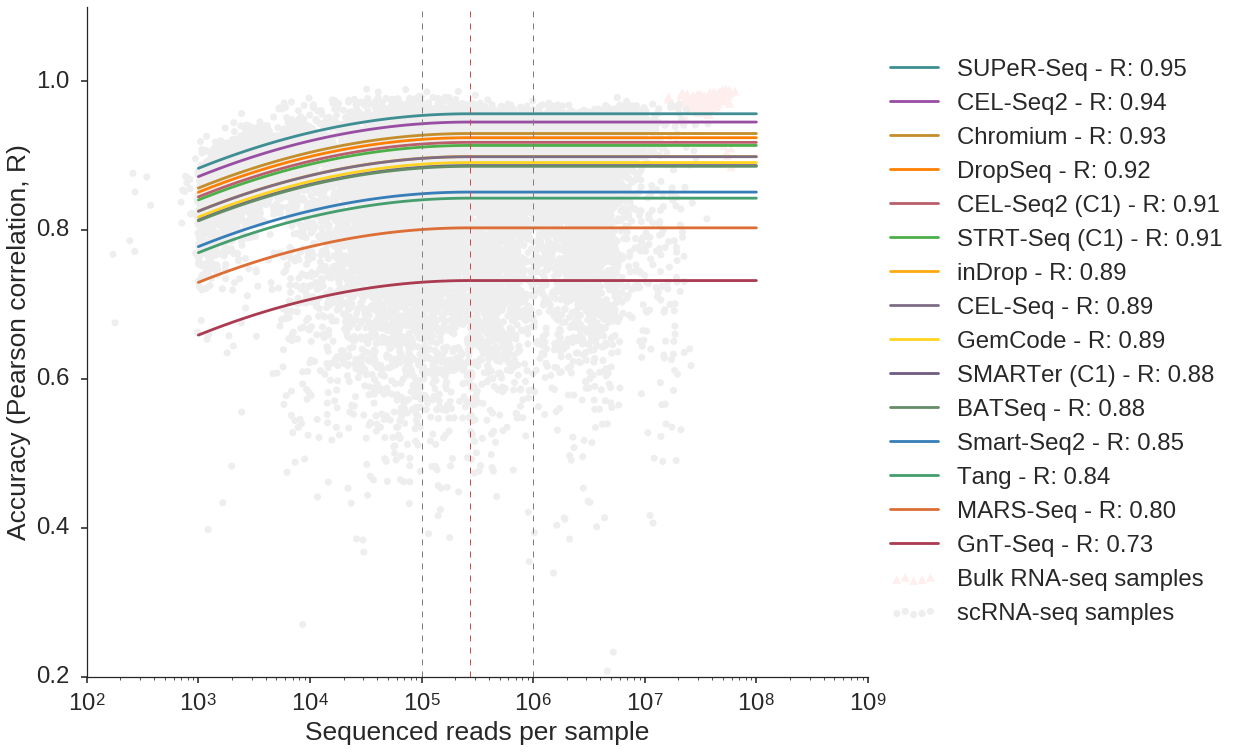

In [70]:
sns.set_context('poster', font_scale=1.5)

figsize(14, 12)

plt.xscale('log')

tmp = data.query('protocol == "Bulk"')
plt.scatter(tmp.reads, tmp.accuracy, c='#FFEEEE', edgecolor='none', s=75, rasterized=True, marker='^', label='Bulk RNA-seq samples');

tmp = data.query('protocol != "Bulk"')
plt.scatter(tmp.reads, tmp.accuracy, c='#EEEEEE', edgecolor='none', s=50, rasterized=True, label='scRNA-seq samples');

accus = normalised_accuracy.str.get(0).sort_values()
for protocol in normalised_accuracy.sort_values(ascending=False).index:
    if 'Freeze' in protocol:
        continue
        
    if 'Seq2_'in protocol:
        continue
        
    if protocol in ['STRT-C1', 'Smartseq-C1', 'Smartseq2-C1']:
        continue

    tmp = data.query('protocol == "{}"'.format(protocol))
    pdf['protocol'] = protocol
    yy = res.predict(pdf)
    xx2 = np.concatenate((xx, np.array([1e8])))
    yy2 = np.concatenate((yy, yy[[-1]]))
    label = 'STRT-Seq (C1)' if protocol == 'STRT-Seq' else protocol
    plt.plot(xx2, yy2, label='{} - R: {:.2f}'.format(label, accus[protocol]), c=color_map[protocol])

plt.axvline(xx[-1], linestyle='--', c='r', lw=1)
plt.axvline(1e6, linestyle='--', c='grey', lw=1)
plt.axvline(1e5, linestyle='--', c='grey', lw=1)

lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), scatterpoints=5);

sns.despine()
sns.axlabel('Sequenced reads per sample', 'Accuracy (Pearson correlation, R)');
plt.ylim(0.2, 1.1)
plt.savefig('figures_rev_2/reads-accuracy-relation.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [145]:
def generalised_logistic_function(t, A, K, B, nu, Q):
    return A + (K - A) / (1 + Q * np.exp(-B * t[:, 0])) ** -nu

In [127]:
from scipy.optimize import curve_fit

In [130]:
tmp = data[['reads', 'protocol', 'molecule_limit', 'platform']].replace(np.inf, np.nan).dropna().query('protocol != "Bulk"')
t_data = np.log10(tmp['reads']).as_matrix()[:, None]
y_data = np.log10(tmp['molecule_limit']).as_matrix()

In [131]:
popt, pcov = curve_fit(generalised_logistic_function, t_data, y_data, method='dogbox', )

In [132]:
popt

array([ -1.01965652e+01,   2.48585704e-01,   2.76465103e-01,
         1.22379460e+02,   4.66051644e-03])

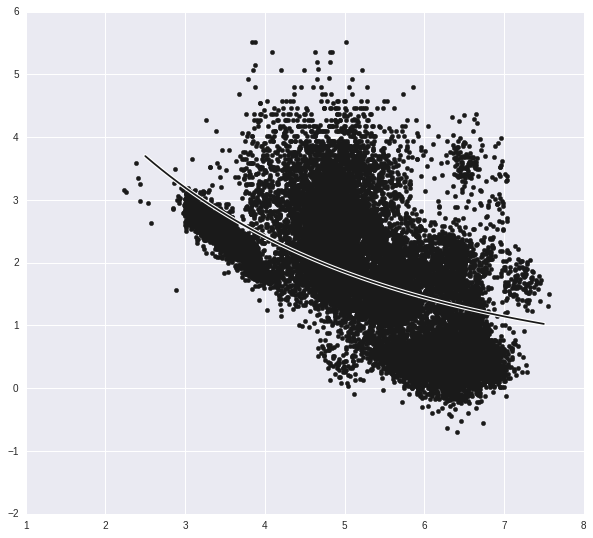

In [134]:
plt.scatter(t_data, y_data, c='k');
tt = np.linspace(2.5, 7.5)[:, None]
yy = generalised_logistic_function(tt, *popt)
plt.plot(tt, yy, c='w', lw=4);
plt.plot(tt, yy, c='k');

In [146]:
def generalised_logistic_function(t, A_0, A_1, K, B, nu, Q):
    A = (A_0 * t[:, 1] + A_1 * (1 - t[:, 1]))
    return A + (K - A) / (1 + Q * np.exp(-B * t[:, 0])) ** -nu

In [147]:
new_t_data = np.hstack((t_data, (tmp['protocol'] == 'Chromium')[:, None]))

In [148]:
popt, pcov = curve_fit(generalised_logistic_function, new_t_data, y_data, method='dogbox', )

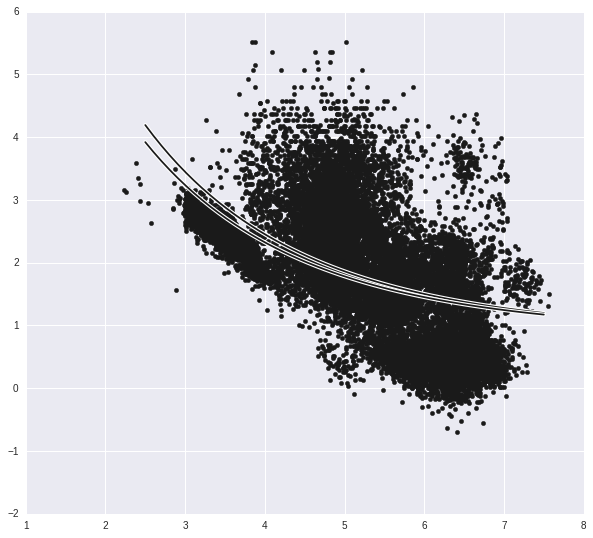

In [149]:
plt.scatter(t_data, y_data, c='k');
tt = np.linspace(2.5, 7.5)[:, None]
for c in [0, 1]:
    ttt = np.hstack((tt, 0 * tt + c))
    yy = generalised_logistic_function(ttt, *popt)
    plt.plot(tt, yy, c='w', lw=4);
    plt.plot(tt, yy, c='k');

In [150]:
import patsy

In [188]:
t_per_prot = np.asarray(patsy.dmatrix('reads + C(protocol) - 1', tmp))

In [189]:
t_per_prot[:, :25]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [220]:
t_per_prot

array([[        0.,         0.,         0., ...,         0.,         0.,
         15005723.],
       [        0.,         0.,         0., ...,         0.,         0.,
         18039621.],
       [        0.,         0.,         0., ...,         0.,         0.,
         17520328.],
       ..., 
       [        0.,         0.,         0., ...,         0.,         0.,
          2724182.],
       [        0.,         0.,         0., ...,         0.,         0.,
          1810960.],
       [        0.,         0.,         0., ...,         0.,         0.,
          2156938.]])

In [190]:
t_per_prot.shape

(20717, 26)

In [211]:
def generalised_logistic_function(t, A_arr, K, B, nu, Q):
    A = t[:, :-1].dot(A_arr)
    return A + (K - A) / (1 + Q * np.exp(-B * t[:, -1])) ** -nu

In [215]:
def glf_wrapper(t, *args):
    offset = t.shape[-1] - 1
    A_arr, K, B, nu, Q = args[0][:offset], args[0][offset], args[0][offset + 1], args[0][offset + 2], args[0][offset + 3]
    return generalised_logistic_function(t, A_arr, K, B, nu, Q)

In [219]:
glf_wrapper(t_per_prot, np.ones(30))

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [217]:
t_per_prot[:, :-1].dot(np.ones(25))

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])